In [0]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [192]:
df = pd.read_csv('./Appointments.csv')
display(df.head(10))

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [193]:
display(df.describe())

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Questions

1- What is the percentage of the patients have and don't have scholarship, Hipertension, Diabetes, Alcoholism, Handcap , received SMS, show up and no show.

2- What is the percentage of the males have and don't have scholarship, Hipertension, Diabetes, Alcoholism, Handcap , received SMS, show up and no show.

3- What is the percentage of females have and don't have scholarship, Hipertension, Diabetes, Alcoholism, Handcap , received SMS, show up and no show.

4- What is the neighbourhood which receiving high number of the patients got Scholarship.

5- What is the Neighbourhood which receiving high number of the patients got Scholarship.

6- Which gender has the most scholarship

7- What is the patitent's age how has high number of show up. and they are females or males

8- What is the patients' age who are alcoholism.

9- Which neighbourhood receiving high percentage of patient in the following [Scholarship, Hipertension, Diabetes, Alcoholism, Handcap].

10- what is the percentage of the patients who have received SMS and have showed up.

In [194]:
df.rename(columns={"No-show": "NoShow"}, inplace=True)
df.drop(df[df.Handcap.isin([2, 3, 4])].index, inplace=True)
df = df[(df['Age'] < 100) & (df['Age'] > 0)]


df['NoShow'] = df['NoShow'].str.replace('No', '1')
df['NoShow'] = df['NoShow'].str.replace('Yes', '0')
df['NoShow'] = df['NoShow'].astype(int)

df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").date())
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").date())
df['Waiting_time'] = (df['AppointmentDay'] - df['ScheduledDay']).astype('timedelta64[D]')

total_of_patinet = len(df)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,Waiting_time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0.0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0.0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0.0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0.0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0.0


In [0]:
def calculate_percentage(name, df, text):
    if name == 'NoShow':
        yes, no = df[name].value_counts()
        print(f'percentage of {text} no show: {no/total_of_patinet*100}%')
        print(f'percentage of {text} Show up : {yes/total_of_patinet*100}%')
    else:
        not_have, have = df[name].value_counts()
        print(f'percentage of {text} not have {name} : {not_have/total_of_patinet*100}%')
        print(f'percentage of {text} have {name} : {have/total_of_patinet*100}%')


columns = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'NoShow']
df_female = df[df['Gender'] == 'F']
df_male = df[df['Gender'] == 'M']

In [196]:
for name in columns:
    calculate_percentage(name, df, 'patinets')

percentage of patinets not have Scholarship : 89.89389100649015%
percentage of patinets have Scholarship : 10.106108993509839%
percentage of patinets not have Hipertension : 79.66322335334388%
percentage of patinets have Hipertension : 20.336776646656116%
percentage of patinets not have Diabetes : 92.60140292385064%
percentage of patinets have Diabetes : 7.398597076149358%
percentage of patinets not have Alcoholism : 96.86074716465156%
percentage of patinets have Alcoholism : 3.139252835348436%
percentage of patinets not have Handcap : 98.09415885443494%
percentage of patinets have Handcap : 1.905841145565056%
percentage of patinets not have SMS_received : 67.6559558706463%
percentage of patinets have SMS_received : 32.3440441293537%
percentage of patinets no show: 20.26279067589462%
percentage of patinets Show up : 79.73720932410538%


In [197]:
for name in columns:
    calculate_percentage(name, df_female, 'female')

percentage of female not have Scholarship : 57.303539151689975%
percentage of female have Scholarship : 8.253650130646113%
percentage of female not have Hipertension : 51.23856261179842%
percentage of female have Hipertension : 14.318626670537663%
percentage of female not have Diabetes : 60.331344765258436%
percentage of female have Diabetes : 5.225844517077648%
percentage of female not have Alcoholism : 64.41181153244612%
percentage of female have Alcoholism : 1.1453777498899576%
percentage of female not have Handcap : 64.45582850239285%
percentage of female have Handcap : 1.1013607799432463%
percentage of female not have SMS_received : 43.33330211562415%
percentage of female have SMS_received : 22.223887166711933%
percentage of female no show: 13.341824550230855%
percentage of female Show up : 52.21536473210523%


In [198]:
for name in columns:
    calculate_percentage(name, df_male, 'male')

percentage of male not have Scholarship : 32.59035185480019%
percentage of male have Scholarship : 1.8524588628637255%
percentage of male not have Hipertension : 28.424660741545466%
percentage of male have Hipertension : 6.018149976118452%
percentage of male not have Diabetes : 32.27005815859221%
percentage of male have Diabetes : 2.1727525590717103%
percentage of male not have Alcoholism : 32.44893563220544%
percentage of male have Alcoholism : 1.993875085458479%
percentage of male not have Handcap : 33.638330352042104%
percentage of male have Handcap : 0.8044803656218099%
percentage of male not have SMS_received : 24.32265375502215%
percentage of male have SMS_received : 10.120156962641767%
percentage of male no show: 6.9209661256637665%
percentage of male Show up : 27.52184459200015%


We need to explore which neighborhood receiving a high number of patients having Scholarship the following graph answer on our questions.

Text(0.5, 0, 'Neighbourhood')

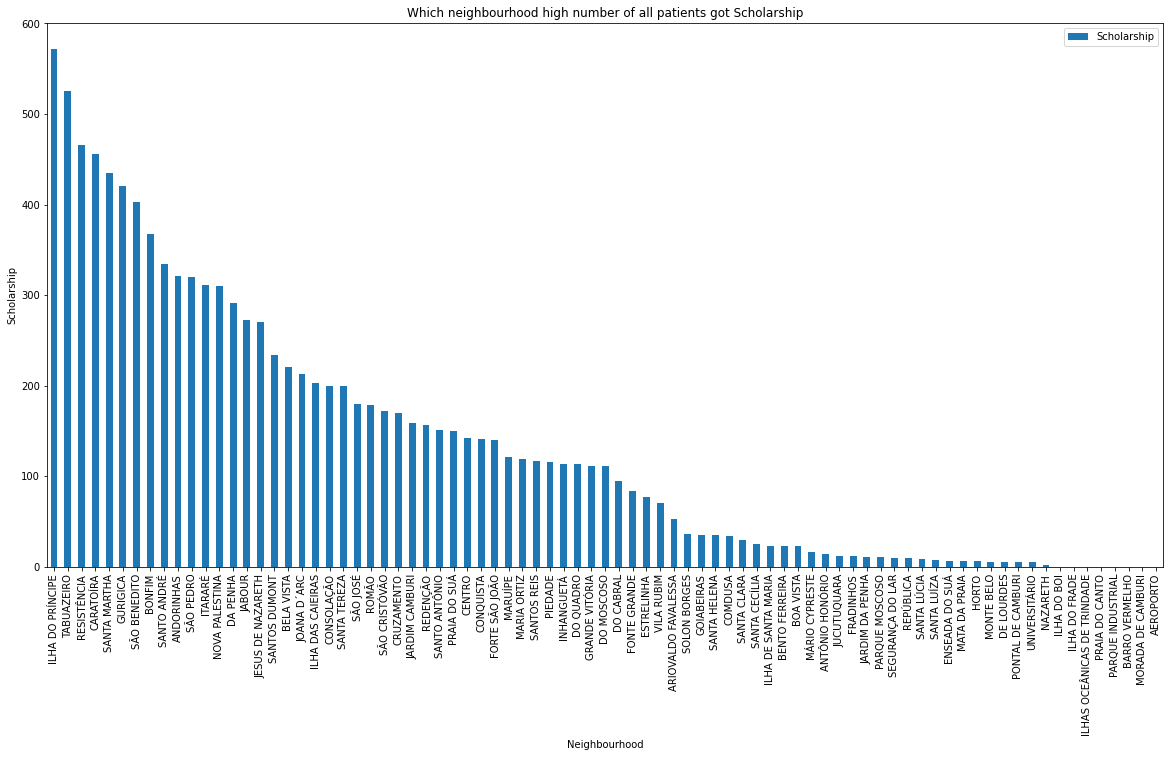

In [199]:
neighborhood_scholarship_df = df[['Neighbourhood', 'Scholarship']]
total_results = neighborhood_scholarship_df.groupby(['Neighbourhood']).sum()
total_results = total_results.sort_values('Scholarship', ascending=False)
total_results.plot(kind='bar', figsize=(20, 10), title='Which neighbourhood high number of all patients got Scholarship')
plt.ylabel("Scholarship")
plt.xlabel("Neighbourhood")

Which gender has the most scholarship?

,Scholarship
Gender,
F,8813
M,1978


Text(0, 0.5, 'Scholarship')

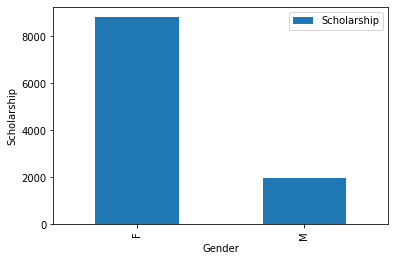

In [200]:
scholarship_gender_df = df[['Scholarship', 'Gender']]
total_results = scholarship_gender_df.groupby('Gender').sum()
display(total_results)
total_results.plot(kind='bar', figsize=(6, 4))
plt.ylabel('Scholarship')

We need to see if the patient's age affects the number of show up patients.

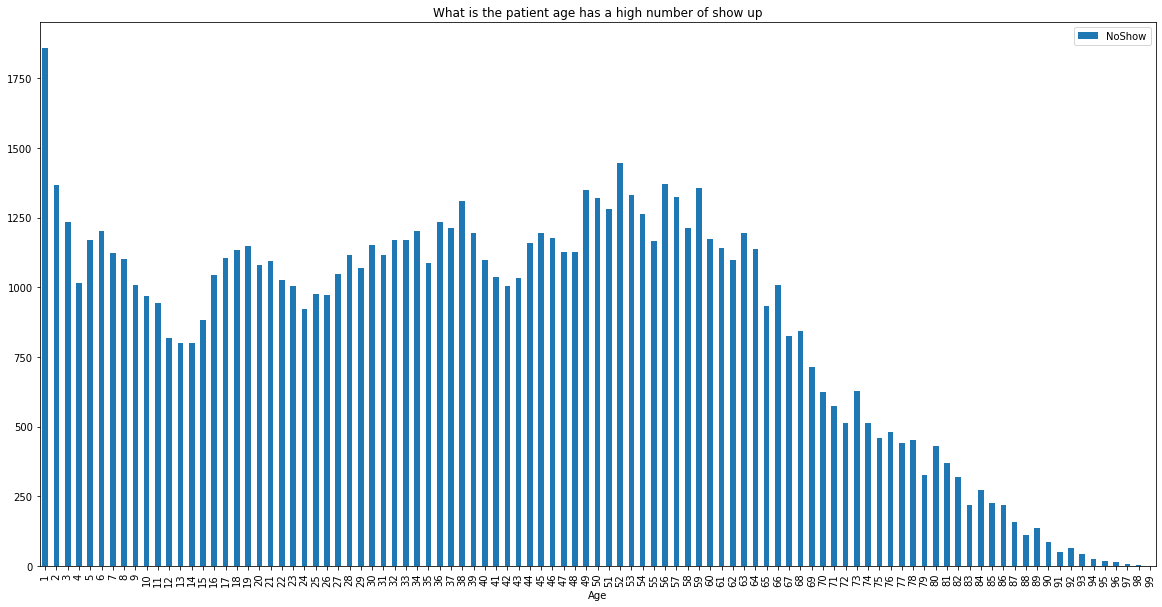

In [201]:
noshow_age_df = df[['NoShow', 'Age']]
total_results = noshow_age_df.groupby('Age').sum()
total_results.plot(kind='bar', figsize=(20, 10), title='What is the patient age has a high number of show up')

We need to see which gender of patient age who showing up more.

,NoShow
Gender,
F,55754
M,29387


Text(0, 0.5, 'No Show')

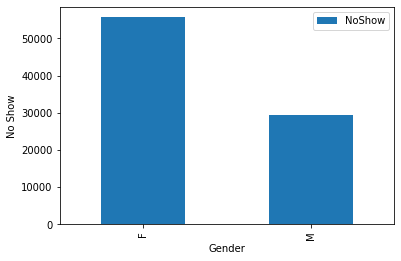

In [202]:
noshow_age_df = df[['NoShow', 'Gender']]
total_results = noshow_age_df.groupby('Gender').sum()
display(total_results)
total_results.plot(kind='bar', figsize=(6, 4))
plt.ylabel('No Show')

We need to know if there is relation between patient age and alcoholism?

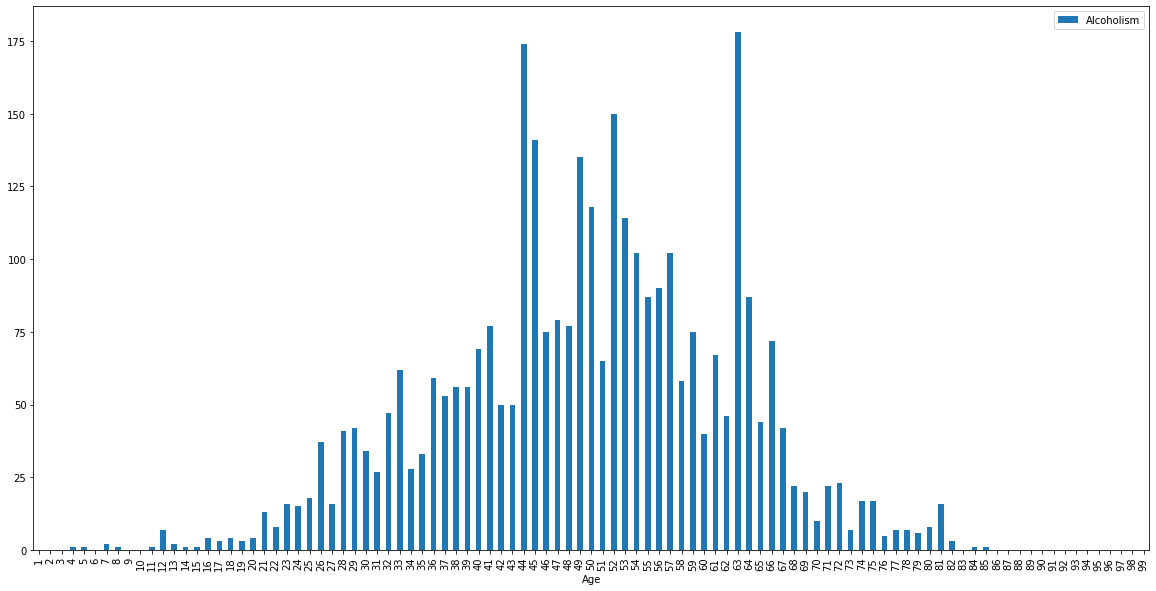

In [203]:
age_alcoholism_df = df[['Age', 'Alcoholism']]
total_results = age_alcoholism_df.groupby('Age').sum()
total_results.plot(kind='bar', figsize=(20, 10))

We need to determine which neighborhood receiving a high percentage of patients showing up.

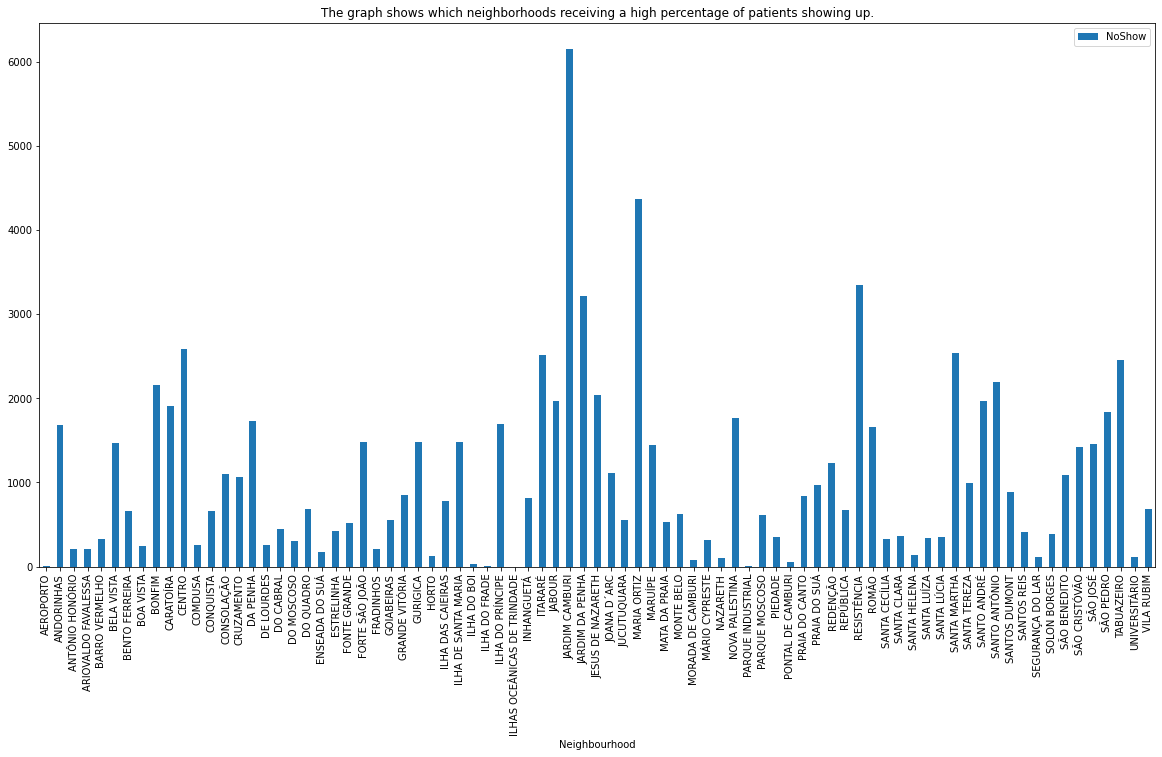

In [204]:
noshow_neighborhood_df = df[['Neighbourhood', 'NoShow']]
total_results = noshow_neighborhood_df.groupby('Neighbourhood').sum()
total_results.plot(kind='bar', figsize=(20, 10), title='The graph shows which neighborhoods receiving a high percentage of patients showing up.')

The percentage of patients had received a high number of SMS and show up associated with patient gender.

Text(0, 0.5, 'SMS_received / NoShow')

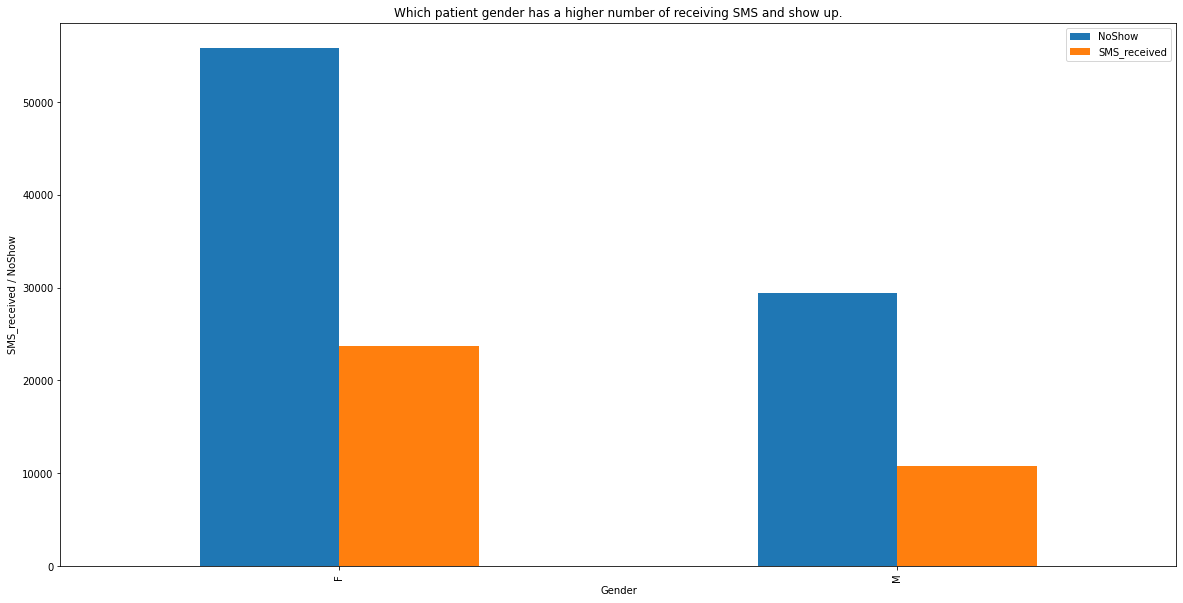

In [217]:
noshow_sms_gender_df = df[['NoShow', 'SMS_received', 'Gender']]
total_results = noshow_sms_gender_df.groupby('Gender').sum()

total_results.plot(kind='bar', figsize=(20, 10), title="Which patient gender has a higher number of receiving SMS and show up.")
plt.ylabel('SMS_received / NoShow')

We need to see if there is a relation between the number of patients have a scholarship and receive SMS and show up.

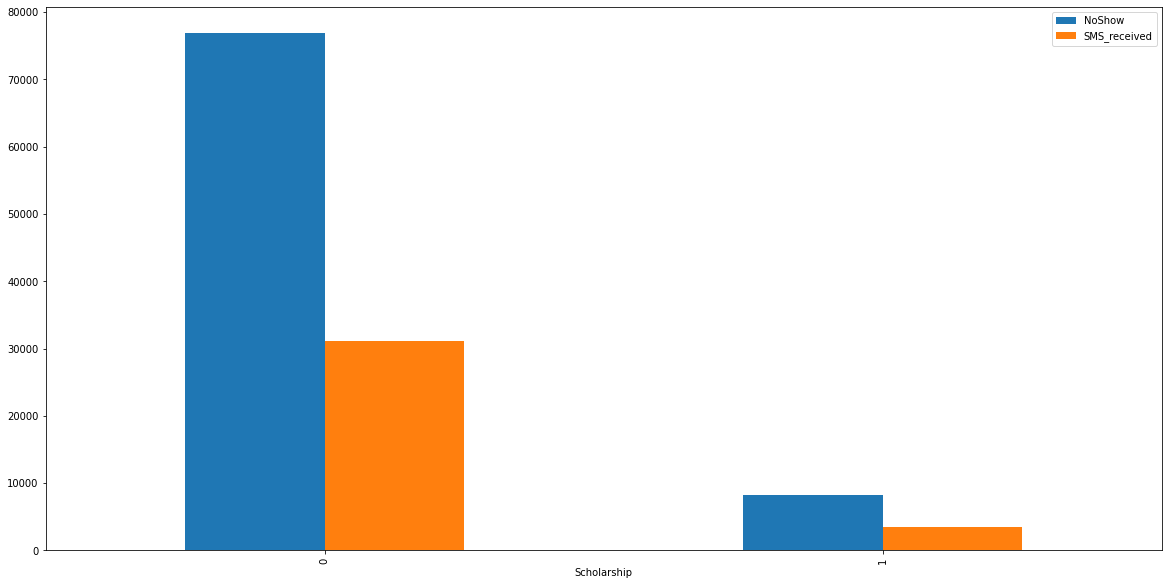

In [224]:
noshow_sms_scholarship_df = df[['NoShow', 'Scholarship', 'SMS_received']]
total_results = noshow_sms_scholarship_df.groupby('Scholarship').sum()
total_results.plot(kind='bar', figsize=(20, 10))

**Conclusions Phase**

While working on the Medical Appointment No Shows dataset I found the data needs to be cleaned to can perform EDAScholarship process. for that i exclude all non meaningful data from dataset to get meaningful.



I dropped all ages more than 100 and less than 0 as not present real value.
I dropped all Handicap has 2,3,4 value as not represent any value we can use it in our analysis process.



From dataset I found that many conclusions as the following:

1. 89% of patients doesn't have a scholarship and only 11% get the benefits from the social program.

2. 7% of patients only have diabetes.

3. High numbers of patients are alcoholics, their age falls between 44 to 64 the major of them are males patients.

4. 80% of patients show up, the characteristics that shows up are females and at age 1, almost of these patient located at JARDIM CAMBURI.

5. A big number of patients show up and they didn't have a scholarship (scholarship doesn't affect on the number of patient show up).

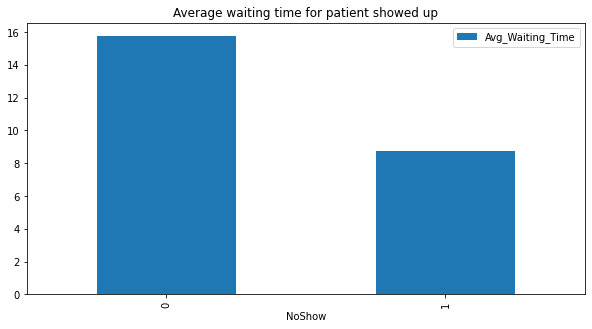

In [235]:
noshow_waitingtime_df = df[['NoShow', 'Waiting_time']]

total_results = noshow_waitingtime_df.groupby(['NoShow']).mean()
total_results.rename(columns={'Waiting_time': 'Avg_Waiting_Time'}, inplace=True)
total_results.sort_values('Avg_Waiting_Time', ascending=False, inplace=True)
total_results.plot(kind='bar', figsize=(10, 5) ,title='Average waiting time for patient showed up')